In [2]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import sklearn

In [4]:
student_data = pd.read_csv("~/Desktop/DA485 - Capstone/Portugal_Student_Data.csv", sep = ";")
print(student_data.head)


<bound method NDFrame.head of       Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                

In [5]:
print("Data Types:", "\n", student_data.dtypes)

Data Types: 
 Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64


In [6]:
print(student_data.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


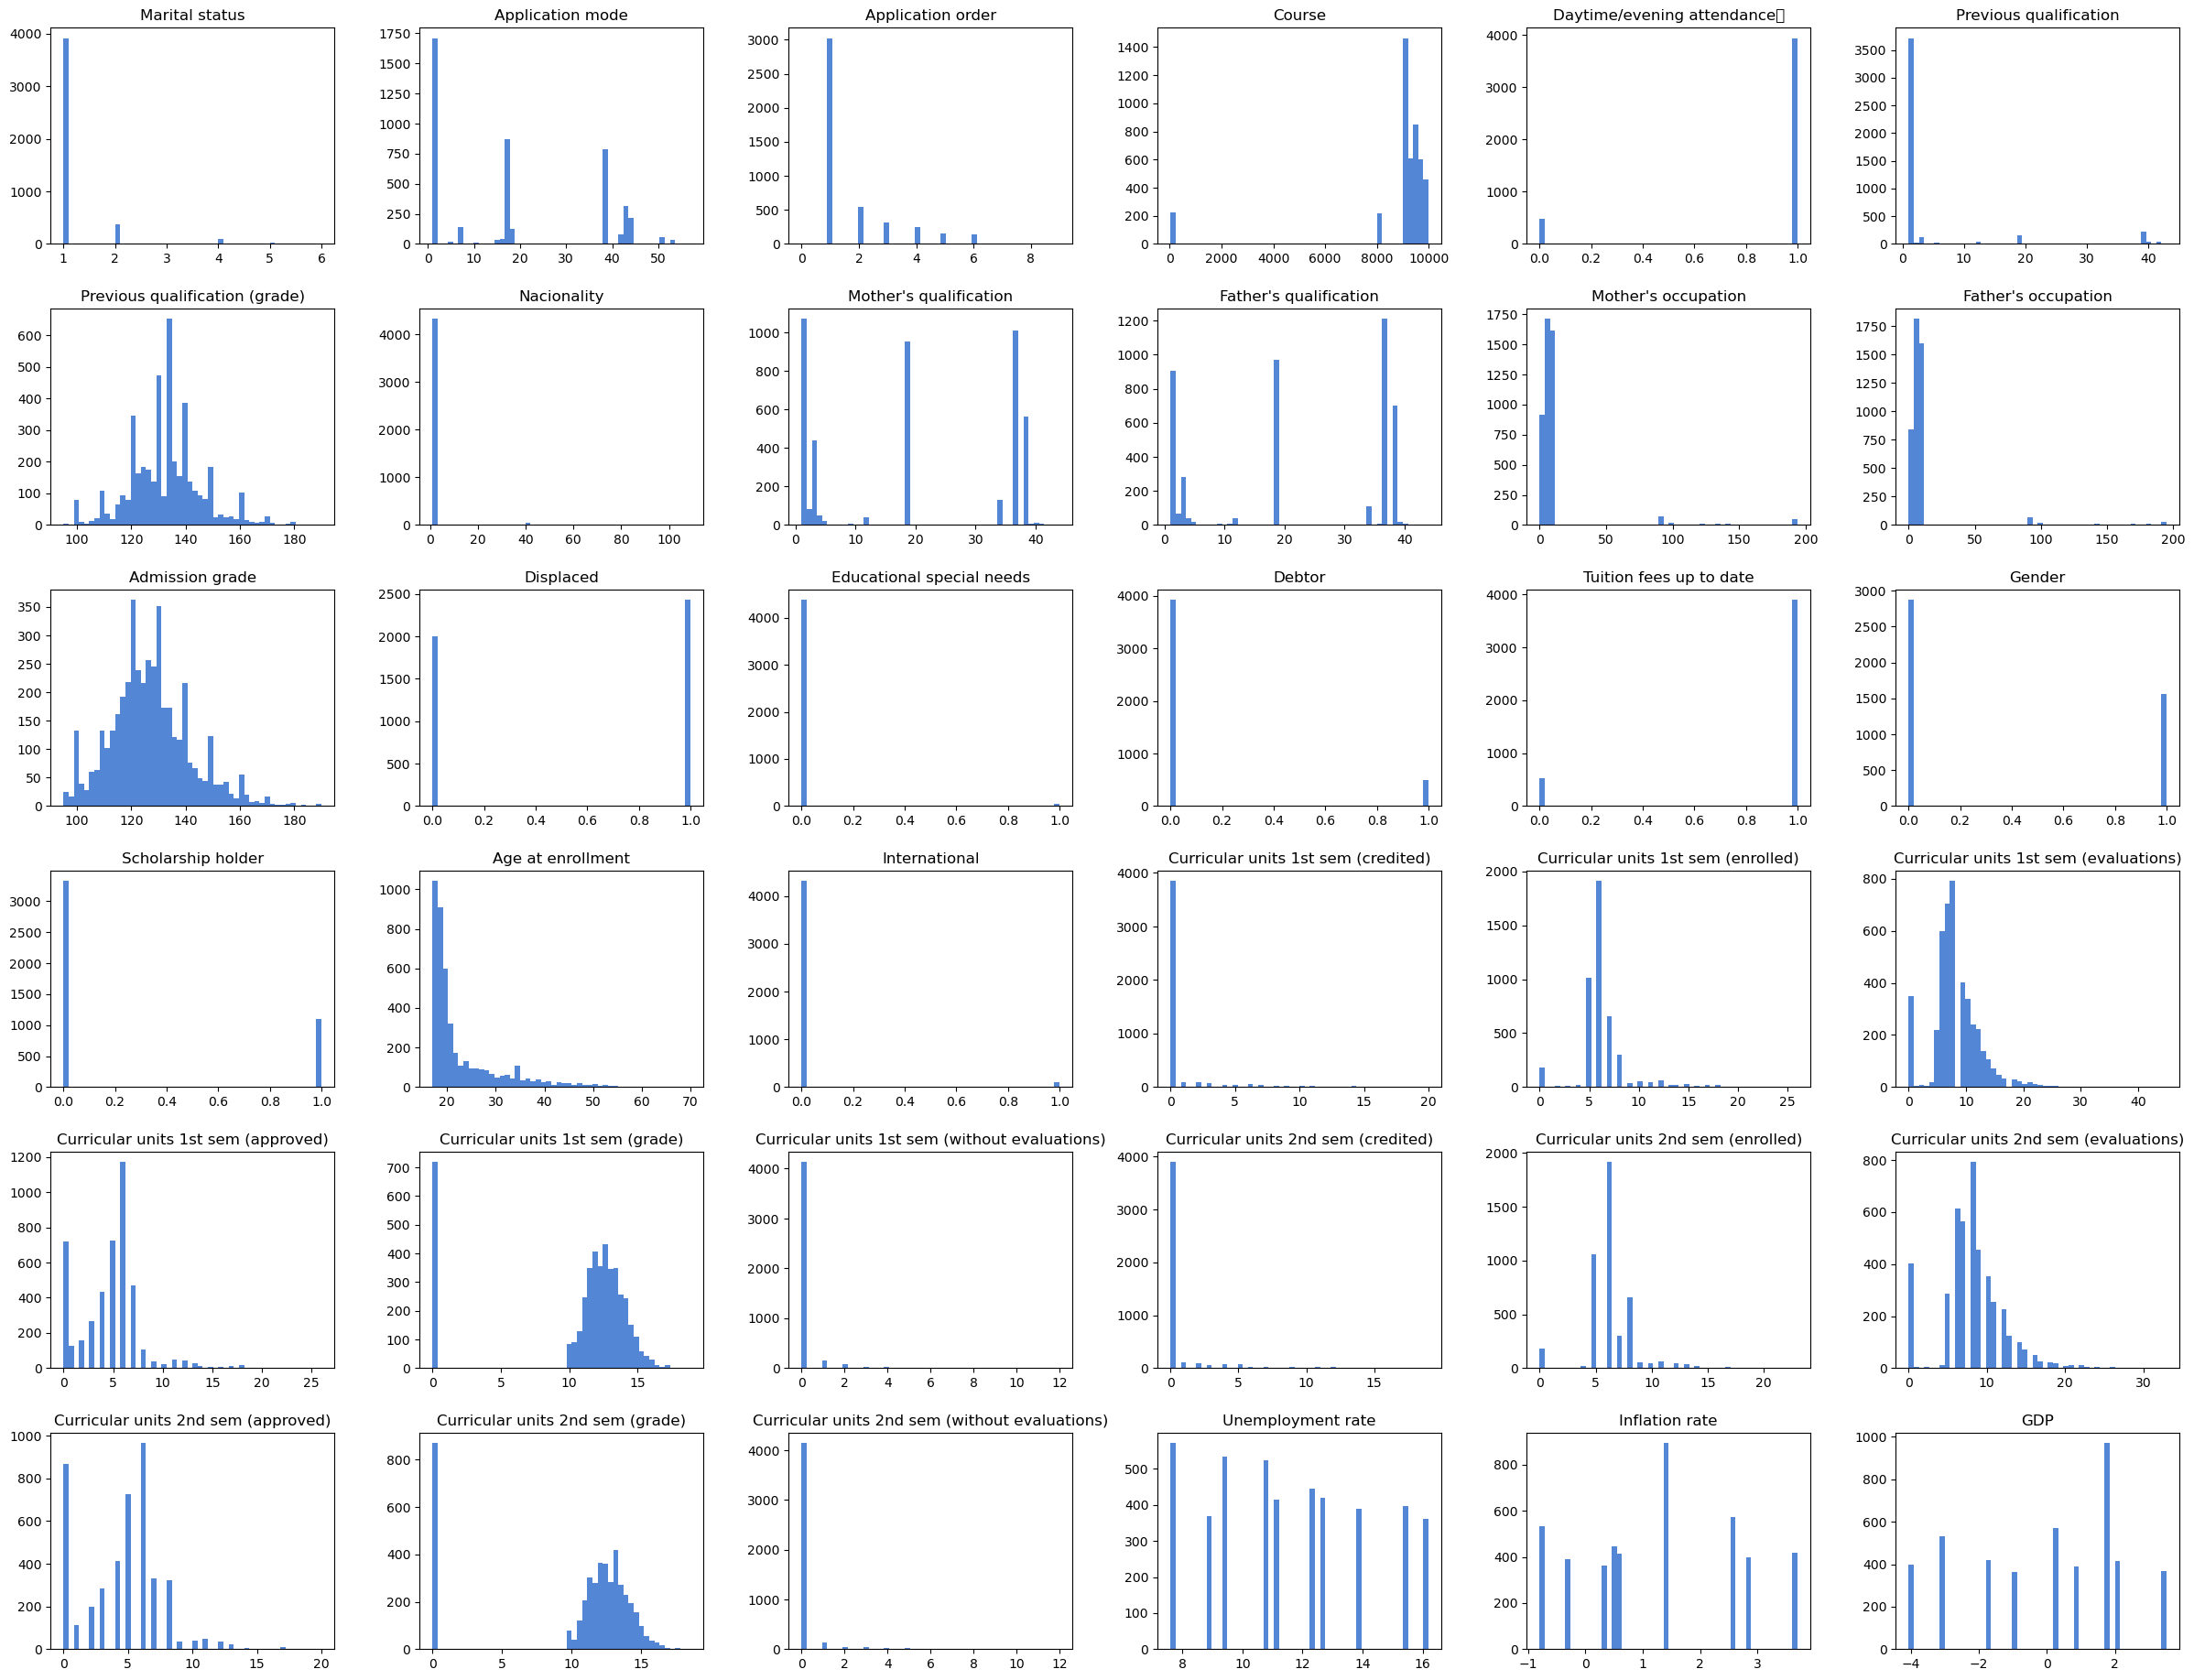

<function matplotlib.pyplot.show(close=None, block=None)>

In [7]:
student_data[student_data.columns].hist(bins= 50, figsize=(30,23), color='#5486d6')
for ax in plt.gcf().get_axes():
    ax.grid(False)

plt.show()
plt.show

In [8]:
continuous_data = student_data[['Previous qualification (grade)', 'Age at enrollment', 
                                'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
                                'Unemployment rate', 'Inflation rate', 'GDP']]
print(continuous_data)


      Previous qualification (grade)  Age at enrollment  Admission grade  \
0                              122.0                 20            127.3   
1                              160.0                 19            142.5   
2                              122.0                 19            124.8   
3                              122.0                 20            119.6   
4                              100.0                 45            141.5   
...                              ...                ...              ...   
4419                           125.0                 19            122.2   
4420                           120.0                 18            119.0   
4421                           154.0                 30            149.5   
4422                           180.0                 20            153.8   
4423                           152.0                 22            152.0   

      Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0          

<Axes: >

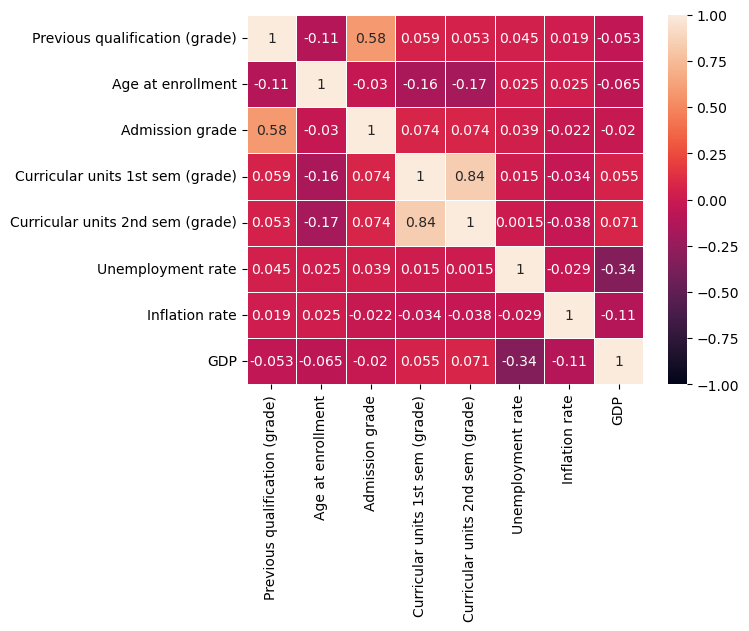

In [9]:
correlations = continuous_data.corr()
sns.heatmap(correlations, annot=True, vmin=-1, vmax=1, linewidth=.5)

In [10]:
df_group_by_type = student_data.groupby('Target')['Curricular units 1st sem (grade)'].apply(np.mean)
df_group_by_type

Target
Dropout      7.256656
Enrolled    11.125257
Graduate    12.643655
Name: Curricular units 1st sem (grade), dtype: float64

In [11]:
from scipy import stats
group1 = student_data[student_data['Target'] == 'Dropout']['Curricular units 1st sem (grade)']
group2 = student_data[student_data['Target'] == 'Graduate']['Curricular units 1st sem (grade)']
t_statistic, p_value = stats.ttest_ind(group1, group2, alternative='less')
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -36.66157442800798
p-value: 6.645336697163824e-251


In [12]:
from scipy import stats
group1 = student_data[student_data['Target'] == 'Dropout']['Curricular units 2nd sem (grade)']
group2 = student_data[student_data['Target'] == 'Graduate']['Curricular units 2nd sem (grade)']
t_statistic, p_value = stats.ttest_ind(group1, group2, alternative='less')
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -45.80885206007108
p-value: 0.0


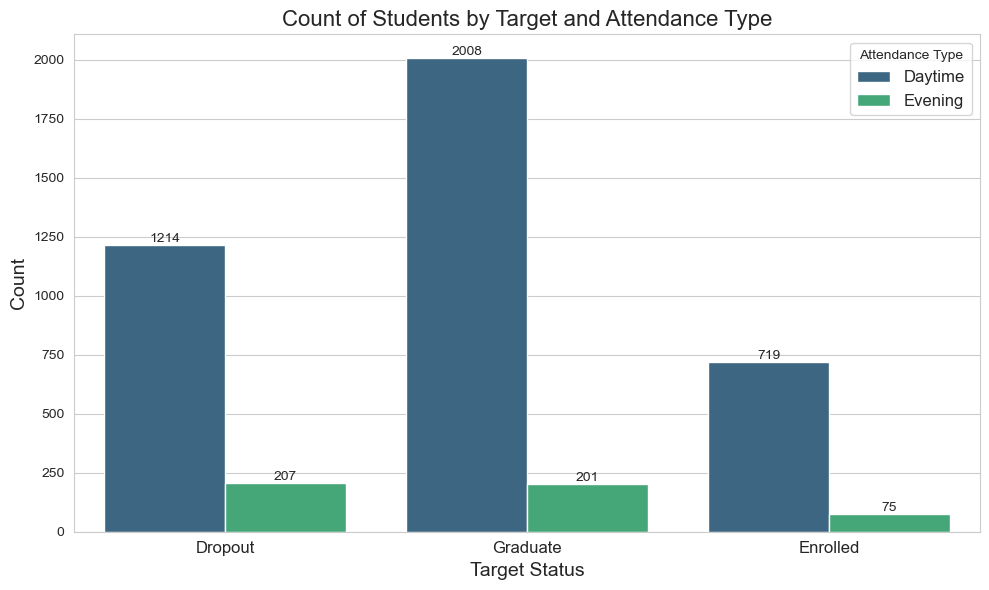

In [13]:
# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the count plot (histogram)
ax = sns.countplot(x='Target', hue='Daytime/evening attendance\t', data=student_data, palette='viridis',
                   hue_order=[1, 0])

# Add labels and title
plt.title('Count of Students by Target and Attendance Type', fontsize=16)
plt.xlabel('Target Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Daytime', 'Evening'], title='Attendance Type', fontsize=12)
# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

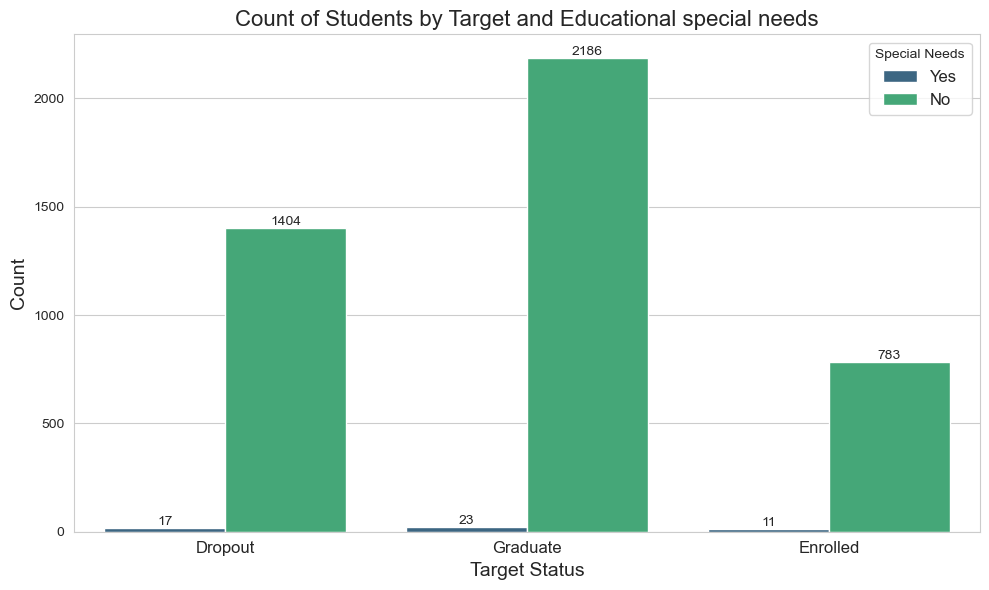

In [14]:
# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the count plot (histogram)
ax = sns.countplot(x='Target', hue='Educational special needs', data=student_data, palette='viridis',
                   hue_order=[1, 0])

# Add labels and title
plt.title('Count of Students by Target and Educational special needs', fontsize=16)
plt.xlabel('Target Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Yes', 'No'], title='Special Needs', fontsize=12)
# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = student_data[['Daytime/evening attendance\t', 'Educational special needs']]
Y = student_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("\nModel Coefficients:")
print(model.coef_)
print("\nModel Intercepts:")
print(model.intercept_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Model Coefficients:
[[-0.38193801  0.11670925]
 [ 0.21367707  0.03888529]
 [ 0.16826094 -0.15559455]]

Model Intercepts:
[ 0.35331496 -0.7104993   0.35718434]
Accuracy: 0.47231638418079097


In [17]:
daytime = student_data[student_data['Daytime/evening attendance\t'] == 1]
evening = student_data[student_data['Daytime/evening attendance\t'] == 0]

print(evening)
print(daytime)

      Marital status  Application mode  Application order  Course  \
4                  2                39                  1    8014   
5                  2                39                  1    9991   
33                 1                18                  1    8014   
34                 1                 1                  1    9991   
38                 4                39                  1    9991   
...              ...               ...                ...     ...   
4383               1                39                  2    8014   
4387               2                 1                  1    9991   
4393               1                39                  1    9991   
4400               2                39                  1    9991   
4409               2                43                  1    9991   

      Daytime/evening attendance\t  Previous qualification  \
4                                0                       1   
5                                0             

In [18]:
X= daytime.drop(columns=['Target'])
Y = daytime['Target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("\nModel Coefficients:")
print(model.coef_)
print("\nModel Intercepts:")
print(model.intercept_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Model Coefficients:
[[-2.14681038e-01  4.66551883e-04  4.87920231e-02  6.59902896e-05
  -5.87161381e-02 -6.67261847e-03  1.90478556e-03  1.09793619e-03
   5.33245738e-03 -6.04964753e-04 -7.56616546e-03  1.69926506e-03
   4.99927515e-04  1.02065376e-01 -1.71285445e-02  5.41786831e-01
  -1.46934248e+00  2.19393300e-01 -3.96138099e-01  4.07681740e-02
  -1.19001499e-01 -3.17390006e-02  1.41620335e-01 -1.30908924e-02
  -2.65725268e-01  6.50020850e-02 -1.77861023e-02  2.19096777e-01
   4.43289313e-01 -4.40846242e-02 -4.90385460e-01 -1.19604453e-01
  -3.13163495e-02  4.86997327e-02  4.96672577e-03  2.10658734e-02]
 [ 1.14645081e-01  3.05129702e-03 -3.37126421e-02  1.00921691e-05
   6.18179944e-02 -1.15330890e-03  1.19946348e-05  1.47438236e-03
  -7.87390317e-03 -1.25469763e-03  1.85304434e-03  1.61229323e-03
  -3.37450422e-03 -1.36059569e-02  7.08584800e-02  1.39986116e-01
   4.65541923e-01  2.39065583e-03 -2.15336138e-01 -2.26684562e-02
   3.71924674e-02  5.78071677e-02  1.14442320e-01  1.2

In [19]:
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))




Feature Importance (Coefficient and Odds Ratio):
                                           Feature  Coefficient  Odds Ratio
15                                          Debtor     0.541787    1.719076
28             Curricular units 2nd sem (enrolled)     0.443289    1.557823
17                                          Gender     0.219393    1.245321
27             Curricular units 2nd sem (credited)     0.219097    1.244952
22             Curricular units 1st sem (enrolled)     0.141620    1.152139
13                                       Displaced     0.102065    1.107456
25                Curricular units 1st sem (grade)     0.065002    1.067161
2                                Application order     0.048792    1.050002
33                               Unemployment rate     0.048700    1.049905
19                               Age at enrollment     0.040768    1.041611
35                                             GDP     0.021066    1.021289
8                           Mother's q

In [20]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})
print("\nPermutation Importance:")
print(perm_importance_df.sort_values(by='Importance Mean', ascending=False))




Permutation Importance:
                                           Feature  Importance Mean  \
30             Curricular units 2nd sem (approved)     2.124208e-01   
24             Curricular units 1st sem (approved)     1.241656e-01   
31                Curricular units 2nd sem (grade)     5.758344e-02   
28             Curricular units 2nd sem (enrolled)     4.900718e-02   
16                         Tuition fees up to date     3.029151e-02   
22             Curricular units 1st sem (enrolled)     2.120828e-02   
19                               Age at enrollment     1.191381e-02   
25                Curricular units 1st sem (grade)     8.534009e-03   
10                             Mother's occupation     6.928602e-03   
29          Curricular units 2nd sem (evaluations)     6.041403e-03   
3                                           Course     5.956907e-03   
33                               Unemployment rate     5.576679e-03   
15                                          Debtor  

In [21]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe_model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(rfe_model, n_features_to_select=5)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)


Selected Features by RFE:
Index(['Daytime/evening attendance\t', 'Tuition fees up to date',
       'Scholarship holder', 'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)'],
      dtype='object')


In [23]:
X_1 = daytime[['Daytime/evening attendance\t', 'Tuition fees up to date', 'Scholarship holder',
               'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)']]
Y_1 = daytime['Target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, Y_1, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
model_1.fit(X1_train, y1_train)

# Predict on the test set
y1_pred = model_1.predict(X1_test)

print("\nModel Coefficients:")
print(model_1.coef_)
print("\nModel Intercepts:")
print(model_1.intercept_)

# Evaluate the model
accuracy_1 = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy_1}")


Model Coefficients:
[[-0.00689888 -1.6048388  -0.41664255  0.50781236 -0.54237879 -0.10183059]
 [ 0.00400164  0.10475564 -0.19544025  0.21145374 -0.31250824  0.04315605]
 [ 0.00289725  1.50008316  0.61208281 -0.7192661   0.85488702  0.05867454]]

Model Intercepts:
[ 1.89699744 -0.40027779 -1.49671965]
Accuracy: 0.7541191381495564
